In [0]:
import pandas as pd
import numpy as np
from datetime import date
from keras.models import model_from_json
df=pd.read_csv('/content/drive/My Drive/datasetratingfinal.csv')
df.columns

Using TensorFlow backend.


Index(['Unnamed: 0', 'Id_User', 'Ville de depart', 'Latitude', 'Longitude',
       'Ville d'arrivée', 'Latitude.1', 'Longitude.1', 'Distance', 'prix',
       'Year_dep', 'Month_dep', 'day_dep', 'weekday_name_dep', 'Hour_dep',
       'minute_dep', 'day_arr', 'weekday_name_arr', 'Hour_arr', 'minute_arr',
       'hour_duree', 'minute_duree', 'nombre_place', 'Moyen_de_transport',
       'traffic', 'route', 'securite', 'accident', 'comfort', 'rating'],
      dtype='object')

In [0]:
df['id_trajet'] =pd.Series(range(1,1177540))

In [0]:
df

In [0]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [0]:
df

In [0]:
count = df['Id_User'].value_counts()
print(count)

99336    2369
69227    2074
96745    1806
86291    1719
86778    1714
         ... 
95829     164
85353     164
76867     159
94472     147
58771     141
Name: Id_User, Length: 1954, dtype: int64


In [0]:
#extract the categorial featuers
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,Ville de depart,Ville d'arrivée,weekday_name_dep,weekday_name_arr,Moyen_de_transport,route
0,KENITRA,AGADIR,Friday,Saturday,Voiture,national
1,MEKNES,AGADIR,Friday,Saturday,autocar,autoroute
2,FES,NADOR,Monday,Monday,Voiture,autoroute
3,MEKNES,MOHAMMADIA,Monday,Tuesday,Voiture,national
4,KENITRA,MARRAKECH,Saturday,Sunday,Voiture,national


In [0]:
df1=pd.get_dummies(df, columns=["weekday_name_dep","weekday_name_arr","Moyen_de_transport",'route'], prefix=["week_dep","week_arr","transport",'route'])

In [0]:
df.drop(['id_trajet','Ville de depart',"Ville d'arrivée",'traffic','securite','accident','comfort'],axis=1,inplace=True) 

In [0]:
df2=df1[['Id_User','Latitude','Longitude','Latitude.1','Longitude.1','Distance','prix','Year_dep','Month_dep','day_dep','Hour_dep','minute_dep','day_arr','Hour_arr','minute_arr','hour_duree','minute_duree','nombre_place','week_dep_Friday','week_dep_Monday','week_dep_Saturday','week_dep_Sunday','week_dep_Thursday','week_dep_Tuesday','week_dep_Wednesday','week_arr_Friday','week_arr_Monday','week_arr_Saturday','week_arr_Sunday','week_arr_Thursday','week_arr_Tuesday','week_arr_Wednesday','transport_CTM','transport_Voiture','transport_autocar','route_autoroute','route_national','rating']]

In [0]:
df2 

,Id_User,Latitude,Longitude,Latitude.1,Longitude.1,Distance,prix,Year_dep,Month_dep,day_dep,Hour_dep,minute_dep,day_arr,Hour_arr,minute_arr,hour_duree,minute_duree,nombre_place,week_dep_Friday,week_dep_Monday,week_dep_Saturday,week_dep_Sunday,week_dep_Thursday,week_dep_Tuesday,week_dep_Wednesday,week_arr_Friday,week_arr_Monday,week_arr_Saturday,week_arr_Sunday,week_arr_Thursday,week_arr_Tuesday,week_arr_Wednesday,transport_CTM,transport_Voiture,transport_autocar,route_autoroute,route_national,rating
0,74337,34.264570,-6.570169,30.422037,-9.559509,601.177000,168.32956,2018,7,20,23,45,21,5,19,5,34,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1,64156,42.651545,-1.309065,30.422037,-9.559509,699.790001,209.93700,2018,8,3,18,28,4,13,59,19,31,22,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1
2,38640,34.034653,-5.016193,35.051918,-2.824399,303.835000,85.07380,2019,2,4,11,12,4,14,34,3,22,3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,3
3,34244,42.651545,-1.309065,33.695838,-7.389329,215.394001,53.84850,2018,4,23,23,6,24,1,14,2,8,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,98100,34.264570,-6.570169,31.625826,-7.989161,377.624000,105.73472,2019,1,12,23,4,13,2,38,3,34,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177534,83934,35.777103,-5.803792,33.267675,-7.581147,376.530999,75.30620,2019,2,15,22,3,16,1,41,3,38,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1
1177535,96096,32.334193,-6.353335,30.920193,-6.910923,299.602000,83.88856,2018,9,18,10,6,18,14,41,4,35,3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,2
1177536,98729,33.595063,-7.618777,33.695838,-7.389329,30.024001,8.40672,2018,11,21,7,31,21,8,1,0,30,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,3
1177537,80519,42.651545,-1.309065,35.051918,-2.824399,361.040000,108.31200,2019,3,16,21,15,17,8,30,11,15,28,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1


In [0]:
X = df2.iloc[:,0:37].values
y = df2.iloc[:,37].values
print('The independent features set: ')
print(X[:,0:37])

The independent features set: 
[[ 7.43370000e+04  3.42645700e+01 -6.57016900e+00 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 6.41560000e+04  4.26515447e+01 -1.30906530e+00 ...  1.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [ 3.86400000e+04  3.40346534e+01 -5.01619260e+00 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 ...
 [ 9.87290000e+04  3.35950627e+01 -7.61877680e+00 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 8.05190000e+04  4.26515447e+01 -1.30906530e+00 ...  1.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 9.06010000e+04  3.57771030e+01 -5.80379200e+00 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]]


In [0]:
import keras
import keras.utils
y=keras.utils.to_categorical(y, num_classes=None, dtype='float32')
y

Using TensorFlow backend.


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [0]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

np.save('/content/drive/My Drive/scaler.npy',min_max_scaler) 

In [0]:
X_scale

array([[0.73173868, 0.05585892, 0.02980151, ..., 0.        , 0.        ,
        1.        ],
       [0.62530187, 0.17572948, 0.07892202, ..., 1.        , 1.        ,
        0.        ],
       [0.35854599, 0.05257284, 0.04431027, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.98674375, 0.04629001, 0.02001114, ..., 0.        , 0.        ,
        1.        ],
       [0.79636812, 0.17572948, 0.07892202, ..., 1.        , 0.        ,
        1.        ],
       [0.90176994, 0.07747675, 0.03695682, ..., 0.        , 1.        ,
        0.        ]])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3)

In [0]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [0]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(824277, 37) (176631, 37) (176631, 37) (824277, 5) (176631, 5) (176631, 5)


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras.layers import Activation
from keras.layers import Dropout 
from keras import regularizers

In [0]:
model = Sequential()
#First Hidden Layer
model.add(layers.Dense(18,input_dim=37, use_bias=False,kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
model.add(Activation("relu"))
Dropout(0.3)
#Second  Hidden Layer
model.add(layers.Dense(18, use_bias=False,kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
model.add(Activation("relu"))
Dropout(0.3)
#Output Layer
model.add(Dense(5,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)))

In [0]:
model.compile(optimizer='sgd',              loss='categorical_crossentropy',              metrics=['accuracy'])

In [0]:
hist = model.fit(X_train, Y_train,          batch_size=32, epochs=5,          validation_data=(X_val, Y_val)) 

Train on 824277 samples, validate on 176631 samples
Epoch 1/5
824277/824277 [==============================] - 41s 50us/step - loss: 0.7382 - accuracy: 0.7483 - val_loss: 0.5675 - val_accuracy: 0.7955
Epoch 2/5
824277/824277 [==============================] - 41s 50us/step - loss: 0.5847 - accuracy: 0.7876 - val_loss: 0.5503 - val_accuracy: 0.7973
Epoch 3/5
824277/824277 [==============================] - 41s 50us/step - loss: 0.5679 - accuracy: 0.7917 - val_loss: 0.5194 - val_accuracy: 0.8143
Epoch 4/5
824277/824277 [==============================] - 42s 50us/step - loss: 0.5593 - accuracy: 0.7930 - val_loss: 0.5428 - val_accuracy: 0.7997
Epoch 5/5
824277/824277 [==============================] - 42s 51us/step - loss: 0.5528 - accuracy: 0.7945 - val_loss: 0.5466 - val_accuracy: 0.7920


In [0]:
# serialize classifier to JSON
classifier_json = model.to_json()
with open("/content/drive/My Drive/model.json", "w") as json_file:
    json_file.write(classifier_json)
# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/model.h5")
print("Saved classifier to disk")

Saved classifier to disk


In [0]:
model.evaluate(X_test, Y_test)[1]

176631/176631 [==============================] - 4s 21us/step


0.7897934317588806

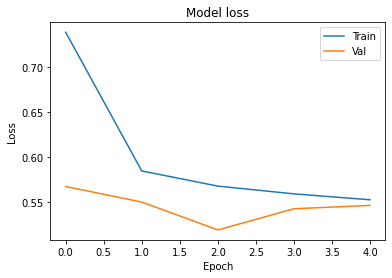

In [0]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

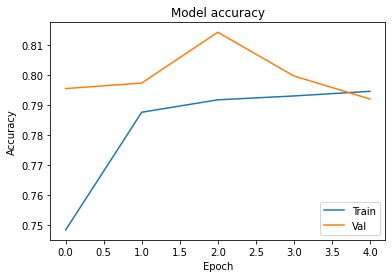

In [0]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [0]:
y_pred=model.predict(X_test)

In [0]:
ypred=np.argmax(y_pred, axis=1)


In [0]:
Ytest=np.argmax(Y_test, axis=1)

In [0]:
from sklearn.metrics import confusion_matrix 
cf_matrix = confusion_matrix (Ytest, ypred) 
print (cf_matrix)

[[36845   232     0     0     0]
 [ 6781 34403   738    83     0]
 [  381 10844 26368  4681   197]
 [   10   324  4138 25148  3094]
 [    0     2    12  4468 17882]]


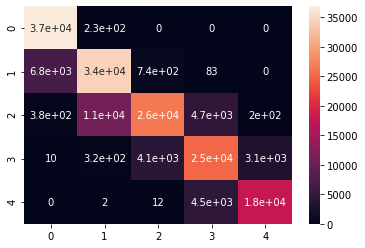

In [0]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)


0 4


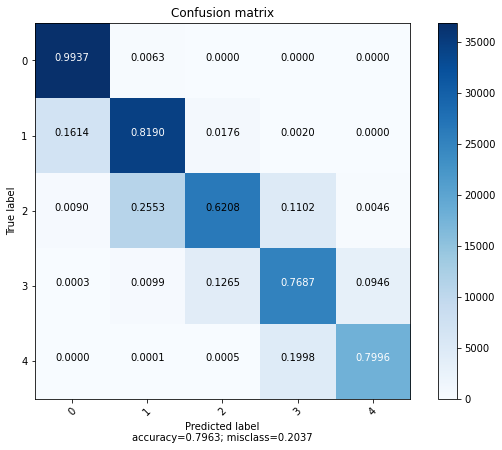

In [0]:
import itertools 
def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


y_pred = model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
print(y_pred.min(),y_pred.max())
cm = confusion_matrix(Y_test, y_pred)
plot_confusion_matrix(cm,range(Y_test.min(),Y_test.max()+1),normalize=True)

In [0]:

print(data.dtypes)

Unnamed: 0              int64
Id_User                 int64
Ville de depart        object
Latitude              float64
Longitude             float64
Ville d'arrivée        object
Latitude.1            float64
Longitude.1           float64
Distance              float64
prix                  float64
Year_dep                int64
Month_dep               int64
day_dep                 int64
weekday_name_dep       object
Hour_dep                int64
minute_dep              int64
day_arr                 int64
weekday_name_arr       object
Hour_arr                int64
minute_arr              int64
hour_duree              int64
minute_duree            int64
nombre_place            int64
Moyen_de_transport     object
traffic                 int64
route                  object
securite                int64
accident                int64
comfort                 int64
rating                  int64
dtype: object


In [0]:
trajet_ratings = df2.groupby('id_trajet').size()
trajet_popularity = df2.groupby('id_trajet')['rating'].sum().sort_values(ascending=False).reset_index()
trajet_popularity = pd.merge(trajet_popularity, trajet_ratings, how='inner', on=['id_trajet'])
trajet_popularity = pd.merge(trajet_popularity, trajet[['id_trajet','Ville de depart',"Ville d'arrivée",'Distance','prix','weekday_name_dep','Hour_dep','minute_dep','day_arr','weekday_name_arr','Hour_arr','minute_arr','Moyen_de_transport','route']], how='inner', on=['id_trajet'])
trajet_popularity = trajet_popularity.sort_values(by=['rating'], ascending=False)
trajet_popularity

NameError: ignored

In [0]:
def testModel(ville_depart,ville_arrive,date_depart):
  """
  params :
  ville_depart : string
  ville_arrive : string
  date_depart : string
  day_depart  : int64

  Month_depart  : int64
  return :
  rating of trips that includes tha paramters in the database (we pretend that we have a database,actually its the same data we traing with)
  """
  data = pd.read_csv('/content/drive/My Drive/datasetratingfinal.csv')
  resultat = data.copy()
  data =pd.get_dummies(data, columns=["weekday_name_dep","weekday_name_arr","Moyen_de_transport",'route'], prefix=["week_dep","week_arr","transport",'route'])
  weekday_name_dep, day_dep,Month_dep,Year_dep = dayOfWeek(date_depart) # maa9lob tartib
  idx = (data['Ville de depart'] == ville_depart) & (data["Ville d'arrivée"] == ville_arrive) & (data['day_dep'] == day_dep) & (data['Month_dep'] == Month_dep) & (data['Year_dep'] ==Year_dep)# you van add the mounths and the year 
  request = data [idx] 
  resultat = resultat[idx]
  resultat.drop(['Unnamed: 0','traffic','securite','accident','comfort','rating'],axis=1,inplace=True)
  
  
  request.drop(['Unnamed: 0','Ville de depart',"Ville d'arrivée",'traffic','securite','accident','comfort','rating'],axis=1,inplace=True)
  
  # get the serialize model and scaller 
  model = loadModel()
  scaler = np.load('/content/drive/My Drive/scaler.npy',allow_pickle=True).item() 

  X_test = request.to_numpy()
  X_test = scaler.transform(X_test)

  Y_pred = model.predict(X_test)
  Y_pred = np.argmax(Y_pred,axis = 1)

  indexes = np.argsort(Y_pred,axis = 0)[::-1]
  resultat = resultat.to_numpy()
  resultat = resultat[indexes]
  resultat = pd.DataFrame(resultat, columns = ['Id_User', 'Ville de depart', 'Latitude', 'Longitude',
       "Ville d'arrivée", 'Latitude.1', 'Longitude.1', 'Distance', 'prix',
       'Year_dep', 'Month_dep', 'day_dep', 'weekday_name_dep', 'Hour_dep',
       'minute_dep', 'day_arr', 'weekday_name_arr', 'Hour_arr', 'minute_arr',
       'hour_duree', 'minute_duree', 'nombre_place', 'Moyen_de_transport','route'])
  
  resultat["rating"] = Y_pred[indexes]
  return resultat


In [0]:
res[['Ville de depart',"Ville d'arrivée", 'Distance', 'prix','weekday_name_dep', 'Hour_dep',
       'minute_dep', 'weekday_name_arr', 'Hour_arr', 'minute_arr',
       'hour_duree', 'Moyen_de_transport', 'nombre_place','route','rating']]

In [0]:
res  = testModel('RABAT','FES','2019/1/23')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Loaded model from disk


In [0]:
res

,Ville de depart,Ville d'arrivée,Distance,prix,weekday_name_dep,Hour_dep,minute_dep,weekday_name_arr,Hour_arr,minute_arr,hour_duree,Moyen_de_transport,nombre_place,route,rating
0,RABAT,FES,275.181,68.7952,Wednesday,16,12,Wednesday,19,4,2,Voiture,1,autoroute,4
1,RABAT,FES,275.181,68.7952,Wednesday,12,54,Wednesday,15,46,2,Voiture,1,autoroute,4
2,RABAT,FES,275.181,77.0507,Wednesday,9,41,Wednesday,12,33,2,Voiture,1,autoroute,4
3,RABAT,FES,275.181,68.7952,Wednesday,9,6,Wednesday,11,58,2,Voiture,1,national,2
4,RABAT,FES,275.181,68.7952,Wednesday,13,4,Wednesday,15,56,2,Voiture,1,national,2
5,RABAT,FES,275.181,55.0362,Wednesday,18,24,Wednesday,21,16,2,Voiture,1,national,2
6,RABAT,FES,275.181,77.0507,Wednesday,7,29,Wednesday,10,21,2,Voiture,1,national,2
7,RABAT,FES,275.181,77.0507,Wednesday,13,33,Wednesday,16,25,2,Voiture,1,national,2
8,RABAT,FES,275.181,55.0362,Wednesday,22,45,Thursday,1,37,2,Voiture,1,national,1


In [0]:
def dayOfWeek(d):
    year, month, day = (x for x in d.split('/'))
    if len(day) == 4:
        tmp = day
        day = year
        year= tmp
    day, month, year = int(day), int(month), int(year)
    dow = date(year, month, day).weekday()
    days = ['Sunday','Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday']
    return days[dow] , day,month,year

In [0]:
def loadModel():
	json_file = open('/content/drive/My Drive/model.json', 'r')
	loaded_model_json = json_file.read()
	json_file.close()
	loaded_model = model_from_json(loaded_model_json)
	# load weights into new model
	loaded_model.load_weights("/content/drive/My Drive/model.h5")
	print("Loaded model from disk")
	return loaded_model

In [0]:
dayOfWeek('2019/1/23') hna reja3tihom 4 f return 

('Tuesday', 23, 1, 2019)

In [0]:
data =  pd.read_csv('/content/drive/My Drive/datasetratingfinal.csv')
idx = (data['Ville de depart'] == 'FES') & (data["Ville d'arrivée"] == 'RABAT')& (data['day_dep'] == 23) & (data['Month_dep'] ==1)& (data['Year_dep'] == 2019)

In [0]:
sum(idx)

5